In [69]:
from pathlib import Path

log_dir = Path("logs")
log_files = list(sorted(log_dir.glob('*.csv')))
print(len(log_files))

source_dir = Path("mini_Project_CodeNet")

1477


In [75]:
import xml.etree.ElementTree as ET

sequences = []
skipped = 0
errored = 0

for log_file in log_files:
    tokens = ['<CODE>']

    problem, solution = log_file.stem.split('-')
    source_file = source_dir / problem / 'Java' / (solution + '.java')
    with open(source_file) as f:
        lines = f.readlines()
    lines = [l + f'/*L{i}*/' for i, l in enumerate(lines)]
    tokens += ''.join(lines).split()

    try:
        # Map line number to data
        state = {}
        output = {}

        tree = ET.parse(log_file)
        trace = tree.getroot()
        for child in trace:
            if child.tag == 'program_point':
                filename, lineno = child.attrib["location"].split(':')
                state[lineno] = my_state = []
                for variable in child:
                    if variable.tag == 'variable':
                        my_state.append((variable.attrib["name"], variable.text))
                    elif variable.tag == 'stdout':
                        output[lineno] = variable.text
            elif child.tag == 'stdout':
                output[lineno] = child.text
        tokens.append('<STATE>')
        for lineno, states in state.items():
            tokens.append(f'L{lineno}')
            for variable in states:
                name, text = variable
                tokens += [name, text]
        tokens.append('<OUTPUT>')
        for lineno, outputs in output.items():
            tokens.append(f'L{lineno}')
            tokens.append('"' + outputs.replace('\n', '\\n') + '"')
    except Exception as e:
        print('Error', log_file, e)
        errored += 1
        continue
    tokens.append('<END>')

    trunc = 100
    tokens = [tok[:trunc] for tok in tokens]
    
    if (len(tokens) < 1000):
        sequences.append(tokens)
    else:
        skipped += 1
print(skipped, 'skipped', errored, 'errored out')

Error logs/p02256-s279856357.csv no element found: line 1, column 0
Error logs/p02256-s656638000.csv no element found: line 1, column 0
Error logs/p02256-s666464379.csv no element found: line 1, column 0
Error logs/p02971-s195607468.csv no element found: line 75, column 5989101
Error logs/p03242-s136189070.csv not well-formed (invalid token): line 17, column 64
Error logs/p03242-s228874361.csv not well-formed (invalid token): line 17, column 64
Error logs/p03242-s389295447.csv not well-formed (invalid token): line 21, column 67
Error logs/p03242-s597642026.csv not well-formed (invalid token): line 17, column 66
Error logs/p03242-s660524854.csv not well-formed (invalid token): line 21, column 66
Error logs/p03242-s903109886.csv not well-formed (invalid token): line 17, column 64
Error logs/p03242-s952312283.csv not well-formed (invalid token): line 17, column 64
Error logs/p04030-s058903206.csv not well-formed (invalid token): line 15, column 68
Error logs/p04030-s071383219.csv not well

In [92]:
from collections import defaultdict
from matplotlib import pyplot as plt

print('number of sequences:', len(sequences))
seq_lengths = defaultdict(int)
token_lengths = defaultdict(int)
code_lengths = defaultdict(int)
state_lengths = defaultdict(int)
output_lengths = defaultdict(int)
for seq in sequences:
    seq_lengths[len(seq)] += 1
    code_lengths[seq.index('<STATE>') - seq.index('<CODE>')-1] += 1
    state_lengths[seq.index('<OUTPUT>') - seq.index('<STATE>')-1] += 1
    output_lengths[seq.index('<END>') - seq.index('<OUTPUT>')-1] += 1
    for tok in seq:
        token_lengths[len(tok)] += 1

# print(code_lengths, state_lengths, output_lengths)

def get_avg(dd):
    long = []
    for l, f in dd.items():
        long += [l] * f
    return sum(long) / len(long)

print('average token length:', get_avg(token_lengths))
print('average sequence length:', get_avg(seq_lengths))
print('average code length:', get_avg(code_lengths))
print('average state length:', get_avg(state_lengths))
print('average output length:', get_avg(output_lengths))

number of sequences: 1423
average token length: 8.33155110775268
average sequence length: 221.33661278988055
average code length: 111.77160927617709
average state length: 103.03092059030217
average output length: 2.534082923401265


Text(0.5, 1.0, 'Token length (capped at 100)')

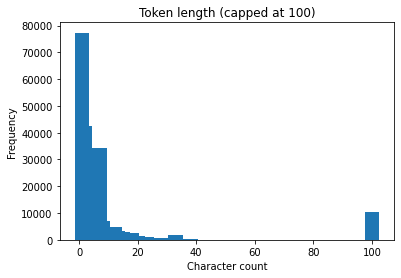

In [93]:
plt.bar(token_lengths.keys(), token_lengths.values(), width=5)
plt.xlabel('Character count')
plt.ylabel('Frequency')
plt.title('Token length (capped at 100)')

Text(0.5, 1.0, 'Sequence length (capped at 1000)')

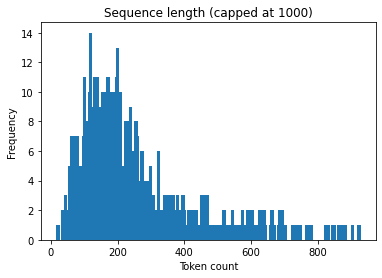

In [94]:
plt.bar(seq_lengths.keys(), seq_lengths.values(), width=10)
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.title('Sequence length (capped at 1000)')

Text(0.5, 1.0, 'Code sequence length')

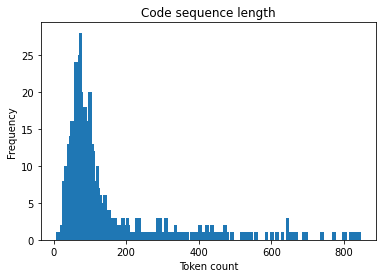

In [97]:
plt.bar(code_lengths.keys(), code_lengths.values(), width=10)
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.title('Code sequence length')

Text(0.5, 1.0, 'State sequence length')

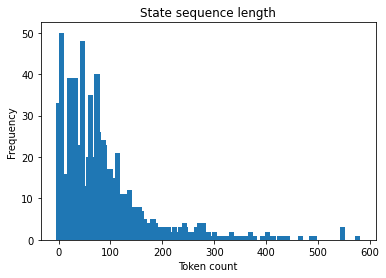

In [98]:
plt.bar(state_lengths.keys(), state_lengths.values(), width=10)
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.title('State sequence length')

Text(0.5, 1.0, 'Output sequence length')

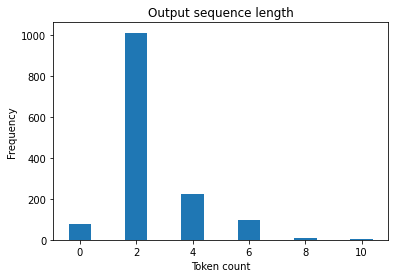

In [99]:
plt.bar(output_lengths.keys(), output_lengths.values())
plt.xlabel('Token count')
plt.ylabel('Frequency')
plt.title('Output sequence length')

In [95]:
import random
for i in range(3):
    seq = random.choice(sequences)
    print(' '.join(seq), end='\n\n')

<CODE> import java.util.HashMap; /*L0*/import java.util.Scanner; /*L1*/ /*L2*/public class Main { /*L3*/ /*L4*/ public static void main(String[] args) { /*L5*/ Scanner sc = new Scanner(System.in); /*L6*/ int n = sc.nextInt(); /*L7*/ int[] a = new int[n]; /*L8*/ int max = 0; /*L9*/ int maxnum = 0; /*L10*/ int submax = 0; /*L11*/ for (int i = 0; i < n; i++) { /*L12*/ a[i] = sc.nextInt(); /*L13*/ if (max <= a[i]) { /*L14*/ submax = max; /*L15*/ max = a[i]; /*L16*/ maxnum = i; /*L17*/ } else if (submax <= a[i]) { /*L18*/ submax = a[i]; /*L19*/ } /*L20*/ } /*L21*/ for (int i = 0; i < n; i++) { /*L22*/ if (i == maxnum) { /*L23*/ System.out.println(submax); /*L24*/ } else { /*L25*/ System.out.println(max); /*L26*/ } /*L27*/ } /*L28*/ } /*L29*/}/*L30*/ <STATE> L7 args [] L8 sc "java.util.Scanner[delimiters=\p{javaWhitespace}+][position=0][match valid=false][need input=false][ args [] L9 sc "java.util.Scanner[delimiters=\p{javaWhitespace}+][position=1][match valid=true][need input=false][s args

In [101]:
with open('sequences.txt', 'w') as f:
    f.writelines([' '.join(' '.join(seq).split()) + '\n' for seq in sequences])